In [1]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline 

# SOME CODE ADAPTED FROM: https://machinelearningmastery.com/calculate-feature-importance-with-python/


file = '2015_16_Districtwise.csv'
df = pd.read_csv(file)
df_consolidated = pd.read_csv('Consolidated States (1).csv')
df = df[df['OVERALL_LI'].notnull()]
df['STATNAME'] = df['STATNAME'].apply(lambda x: x.lower())
state_lit_series = df.groupby('STATNAME')['OVERALL_LI'].mean()


df_state = df_consolidated.merge(state_lit_series, right_on = 'STATNAME', left_on = 'state', how = 'right' )
#display(df_state)

df_state = df_state.replace('*****', np.nan)


df['P_SCOMPTOT'] = df['SCOMPTOT']/df['SCHTOT'] *100
df = df[df['P_SCOMPTOT'].notnull()]
state_mean_computers = df.groupby('STATNAME')['P_SCOMPTOT'].mean()

df['P_SCHTOTG'] = df['SCHTOTG']/df['SCHTOT'] *100
df = df[df['P_SCHTOTG'].notnull()]
state_mean_government = df.groupby('STATNAME')['P_SCHTOTG'].mean()

df = df[df['P_URB_POP'].notnull()]
state_mean_urban = df.groupby('STATNAME')['P_URB_POP'].mean()

df_state = df_state.merge(state_mean_computers, right_on = 'STATNAME', left_on = 'state', how = 'left' )
df_state = df_state.merge(state_mean_government, right_on = 'STATNAME', left_on = 'state', how = 'left' )
df_state = df_state.merge(state_mean_urban, right_on = 'STATNAME', left_on = 'state', how = 'left' )
df_state = df_state.dropna()
display(df_state)

,state,State,Number of Crimes in 2019,Crime: Percent Share of State,Crimes per Lakh,Total Pop (Lakhs),Percent Poverty,Per Capita Net State Domestic Product,Unemployment,Sex Ratio,Income,OVERALL_LI,P_SCOMPTOT,P_SCHTOTG,P_URB_POP
0,a & n islands,A & n islands,4034,0.1,1013.6,0.0,1.0,107418.0,54.0,876.0,89642.0,83.413333,54.370970,86.578626,19.496667
1,andhra pradesh,Andhra pradesh,145751,2.8,278.6,78.8,9.2,81397.0,12.0,993.0,64773.0,67.373077,29.071475,73.562027,28.775385
2,arunachal pradesh,Arunachal pradesh,2877,0.1,190.9,4.9,34.7,85468.0,17.0,938.0,71366.0,65.330000,27.362372,86.648395,12.175625
3,assam,Assam,123783,2.6,385.8,101.3,32.0,44263.0,45.0,958.0,36320.0,73.204815,9.471260,77.337204,13.798889
4,bihar,Bihar,269109,5.2,224.0,358.2,33.7,31199.0,32.0,918.0,22582.0,63.778947,7.796154,89.159213,10.610263
5,chandigarh,Chandigarh,4518,0.1,381.6,2.4,21.8,156951.0,24.0,818.0,136883.0,86.430000,94.527363,57.213930,97.250000
6,chhattisgarh,Chhattisgarh,96561,1.9,334.7,104.1,39.9,58547.0,8.0,991.0,48366.0,69.218125,12.965698,85.372174,19.931250
9,delhi,Delhi,316261,5.2,1586.1,0.3,9.9,212219.0,78.0,868.0,161446.0,86.734444,83.554290,50.265636,18.006667
10,goa,Goa,3727,0.1,241.5,0.8,5.1,224138.0,51.0,973.0,211570.0,87.190000,41.882167,60.501142,62.435000
11,gujarat,Gujarat,431066,8.4,631.6,102.2,16.6,106831.0,3.0,919.0,85979.0,77.627308,74.230117,77.707306,33.306923


{0: 0.05461486837967433, 1: 0.05220835558702924, 2: 0.005155063949850568, 3: 0.1498091678998839, 4: 0.003542099342332207, 5: 0.024390150265886805, 6: 0.02465477487709136, 7: 0.006080031243303333, 8: 0.021257416505295588, 9: 0.49652106634263693, 10: 0.1374339802968174, 11: 0.024333025310195884}


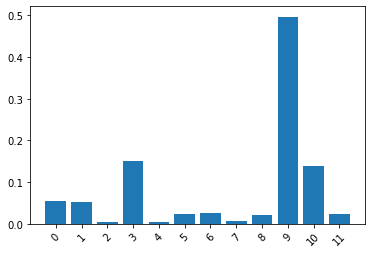

In [2]:

# define the model
model = DecisionTreeRegressor()
# fit the model
X = df_state[['Number of Crimes in 2019','Crime: Percent Share of State', 'Crimes per Lakh', 'Total Pop (Lakhs)', 
       'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']].values.reshape(-1,12)
y = df_state['OVERALL_LI'] 

#display(len(X[:, 0]))
#display(len(Y))

d = dict()
for a in range(10000):
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        if i in d.keys():
            d[i] += v
        else:
            d[i] = v
        # print('Feature: %0d, Score: %.5f' % (i,v))

for k,v in d.items():
    d[k] = v/10000
    #print(d[k])

print(d)

#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

average_scores = list(d.values())
feature_numbers = list(d.keys())
pyplot.bar(range(len(d)), average_scores, tick_label=feature_numbers)
pyplot.xticks(rotation = 45)
pyplot.show()


# in the future, look into which ML models are the best to use on our data
# the model matters a lot when determining feature importance

{0: 0.018307282668370606, 1: 0.005160284514863823, 2: 0.02499581017538342, 3: 0.003600446744716269, 4: 0.14829470835787228, 5: 0.024547007932285734, 6: 0.4859246277772544, 7: 0.26237100279975484, 8: 0.026798829029496898}


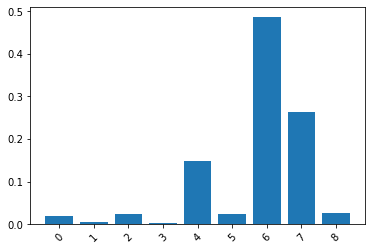

In [8]:
# define the model
model = DecisionTreeRegressor()
# fit the model
X = df_state[['Crimes per Lakh', 'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']].values.reshape(-1,9)
y = df_state['OVERALL_LI'] 

#display(len(X[:, 0]))
#display(len(Y))

d = dict()
for a in range(10000):
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        if i in d.keys():
            d[i] += v
        else:
            d[i] = v
        # print('Feature: %0d, Score: %.5f' % (i,v))

for k,v in d.items():
    d[k] = v/10000
    #print(d[k])

print(d)

#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

average_scores = list(d.values())
feature_numbers = list(d.keys())
pyplot.bar(range(len(d)), average_scores, tick_label=feature_numbers)
pyplot.xticks(rotation = 45)
pyplot.show()


{0: -141.8712525458497, 1: 137.58217104694455, 2: 9.622547502920202, 3: 1.781943601359693, 4: -4.088057124174569, 5: 51.05664777627307, 6: 12.296366911176982, 7: 8.562654665117984, 8: -45.5744692276213, 9: 0.7733458348984151, 10: -2.470450202347542, 11: 9.794788303358155}


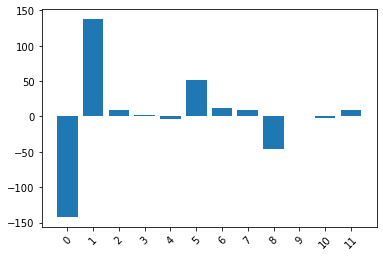

In [9]:
# define the model
model = LinearRegression()

# fit the model
X = df_state[['Number of Crimes in 2019','Crime: Percent Share of State', 'Crimes per Lakh', 'Total Pop (Lakhs)', 
       'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']].values.reshape(-1,12)
y = df_state['OVERALL_LI'] 

norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

#display(X_norm)

#display(len(X[:, 0]))
#display(len(Y))

d = dict()
for a in range(10000):
    model.fit(X_norm, y)
    # get importance
    importance = model.coef_
    # summarize feature importance
    for i,v in enumerate(importance):
        if i in d.keys():
            d[i] += v
        else:
            d[i] = v
        # print('Feature: %0d, Score: %.5f' % (i,v))

for k,v in d.items():
    d[k] = v/10000
    #print(d[k])

print(d)

#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

average_scores = list(d.values())
feature_numbers = list(d.keys())
pyplot.bar(range(len(d)), average_scores, tick_label=feature_numbers)
pyplot.xticks(rotation = 45)
pyplot.show()


# in the future, look into which ML models are the best to use on our data
# the model matters a lot when determining feature importance

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


{0: -141.8712525458497, 1: 137.58217104694455, 2: 9.622547502920202, 3: 1.781943601359693, 4: -4.088057124174569, 5: 51.05664777627307, 6: 12.296366911176982, 7: 8.562654665117984, 8: -45.5744692276213, 9: 0.7733458348984151, 10: -2.470450202347542, 11: 9.794788303358155}


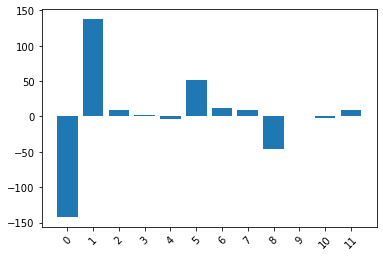

In [4]:
# define the model
model = LinearRegression()

# fit the model

y = df_state['OVERALL_LI'] 

independent_df = df_state[['Number of Crimes in 2019','Crime: Percent Share of State', 'Crimes per Lakh', 'Total Pop (Lakhs)', 
       'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']]
scaler = MinMaxScaler()
independent_df[independent_df.columns] = scaler.fit_transform(independent_df[independent_df.columns])
X = independent_df.values.reshape(-1,12)


d = dict()
for a in range(10000):
    model.fit(X, y)
    # get importance
    importance = model.coef_
    # summarize feature importance
    for i,v in enumerate(importance):
        if i in d.keys():
            d[i] += v
        else:
            d[i] = v
        # print('Feature: %0d, Score: %.5f' % (i,v))

for k,v in d.items():
    d[k] = v/10000
    #print(d[k])

print(d)

#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

average_scores = list(d.values())
feature_numbers = list(d.keys())
pyplot.bar(range(len(d)), average_scores, tick_label=feature_numbers)
pyplot.xticks(rotation = 45)
pyplot.show()


{0: 2.8348456526409116, 1: -4.396275905841996, 2: 31.815357796726556, 3: 12.042725651263783, 4: 11.585849115636428, 5: -25.58030121668707, 6: 4.353274644840148, 7: 2.3544252702716415, 8: 10.636010811151271}


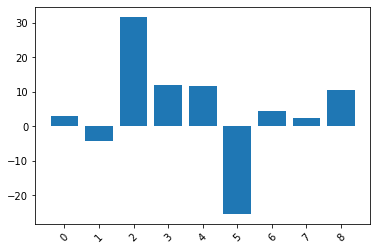

In [10]:
model = LinearRegression()

# fit the model
X = df_state[['Crimes per Lakh', 'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']].values.reshape(-1,9)
y = df_state['OVERALL_LI'] 

norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

#display(X_norm)

#display(len(X[:, 0]))
#display(len(Y))

d = dict()
for a in range(10000):
    model.fit(X_norm, y)
    # get importance
    importance = model.coef_
    # summarize feature importance
    for i,v in enumerate(importance):
        if i in d.keys():
            d[i] += v
        else:
            d[i] = v
        # print('Feature: %0d, Score: %.5f' % (i,v))

for k,v in d.items():
    d[k] = v/10000
    #print(d[k])

print(d)

#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)

average_scores = list(d.values())
feature_numbers = list(d.keys())
pyplot.bar(range(len(d)), average_scores, tick_label=feature_numbers)
pyplot.xticks(rotation = 45)
pyplot.show()

In [6]:
# define the model
model = LinearRegression()

# fit the model

y = df_state['OVERALL_LI'] 

independent_df = df_state[['Number of Crimes in 2019','Crime: Percent Share of State', 'Crimes per Lakh', 'Total Pop (Lakhs)', 
       'Percent Poverty', 'Per Capita Net State Domestic Product', 'Unemployment', 
       'Sex Ratio', 'Income', 'P_SCOMPTOT', 'P_SCHTOTG', 'P_URB_POP']]
scaler = MinMaxScaler()
independent_df[independent_df.columns] = scaler.fit_transform(independent_df[independent_df.columns])
#X = independent_df.values.reshape(-1,12)

X = independent_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
error = mean_squared_error(y_test, predictions)
print('Error: %.2f' % (error))

Error: 51.80


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
